In [36]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import matplotlib.pyplot as plt
import numpy as np


from tensorflow import keras


print(tf.__version__)

2.8.0


In [37]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [38]:
print(train_images.shape, train_labels.shape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28) (60000,)


In [39]:
# Adding dimension
x_train = train_images[..., tf.newaxis] #.reshape((x_train.shape[0],784,1))
x_test = test_images[..., tf.newaxis] 
y_test = test_labels
y_train = train_labels
print(x_train.shape)

(60000, 28, 28, 1)


In [40]:
# Exercise

#1) Define and Train a network for Fashion MNIST classification.

#2) Check the importance of the number of training data by training the model with {60K, 10K, 1K, 300} images.

Definition of a Model

In [41]:
class fMNIST_Model(Model):
    def __init__(self):
        super(fMNIST_Model, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)



In [42]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
EPOCHS = 10

preparing training data

In [43]:
x_train60k = x_train
y_train60k = train_labels
x_train60k = x_train60k[..., tf.newaxis]


x_train10k = np.zeros((10000, 28, 28, 1))
y_train10k = np.zeros(10000)
for i in range(10000):
  x_train10k[i,:,:,0] = x_train [i,:,:,0]
  y_train10k[i] = train_labels [i]
print(x_train10k.shape, y_train10k.shape, x_test.shape, y_test.shape)

x_train1k = np.zeros((1000, 28, 28, 1))
y_train1k = np.zeros(1000)
for i in range(1000):
  x_train1k[i,:,:,0] = x_train [i,:,:,0]
  y_train1k[i] = train_labels [i]

x_train300 = np.zeros((300, 28, 28, 1))
y_train300 = np.zeros(300)
for i in range(300):
  x_train300[i,:,:,0] = x_train [i,:,:,0]
  y_train300[i] = train_labels [i]

(10000, 28, 28, 1) (10000,) (10000, 28, 28, 1) (10000,)


Model training on choosen training and testing data

a) Separate models for each iteration

In [44]:
model1 = fMNIST_Model()
model1.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model2 = fMNIST_Model()
model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model3 = fMNIST_Model()
model3.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model4 = fMNIST_Model()
model4.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

b) Training each model with aproperiate data

In [45]:

H1 = model1.fit(x_train60k, y_train60k, 
                 validation_data=(x_test, y_test), epochs=EPOCHS)
H2 = model2.fit(x_train10k, y_train10k, 
                 validation_data=(x_test, y_test), epochs=EPOCHS)
H3 = model3.fit(x_train1k, y_train1k, 
                 validation_data=(x_test, y_test), epochs=EPOCHS)
H4 = model4.fit(x_train300, y_train300, 
                 validation_data=(x_test, y_test), epochs=EPOCHS)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 10s 4ms/step - loss: 2.7850 - accuracy: 0.6765 - val_loss: 0.9137 - val_accuracy: 0.6747
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7223 - accuracy: 0.7196 - val_loss: 0.6563 - val_accuracy: 0.7518
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5922 - accuracy: 0.7873 - val_loss: 0.5618 - val_accuracy: 0.8045
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5443 - accuracy: 0.8083 - val_loss: 0.5652 - val_accuracy: 0.8073
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5148 - accuracy: 0.8241 - val_loss: 0.5530 - val_accuracy: 0.8125
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5026 - accuracy: 0.8272 - val_loss: 0.6209 - val_accuracy: 0.7833
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4980 - accuracy: 0.8318 - val_loss: 0.5501 - val_accuracy: 0.8260
Ep

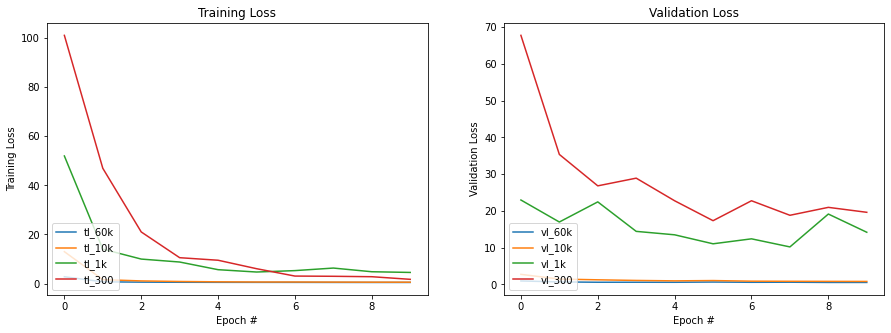

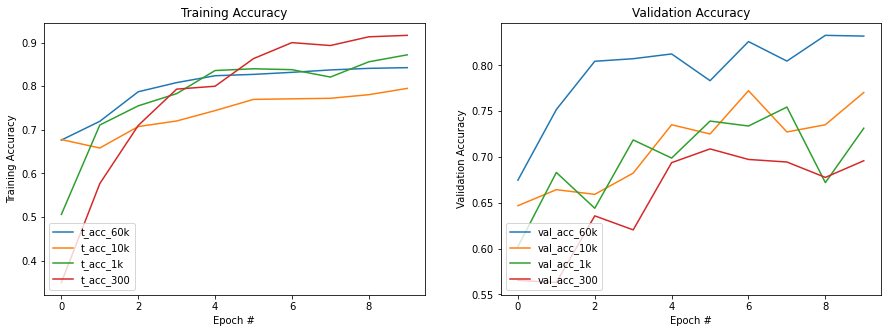

In [46]:
# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
#plt.style.use("ggplot")
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(N, H1.history["loss"], label="tl_60k")
plt.plot(N, H2.history["loss"], label="tl_10k")
plt.plot(N, H3.history["loss"], label="tl_1k")
plt.plot(N, H4.history["loss"], label="tl_300")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Training Loss")
plt.legend(loc="lower left")

plt.subplot(122)
plt.plot(N, H1.history["val_loss"], label="vl_60k")
plt.plot(N, H2.history["val_loss"], label="vl_10k")
plt.plot(N, H3.history["val_loss"], label="vl_1k")
plt.plot(N, H4.history["val_loss"], label="vl_300")
plt.title("Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Validation Loss")
plt.legend(loc="lower left")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(N, H1.history["accuracy"], label="t_acc_60k")
plt.plot(N, H2.history["accuracy"], label="t_acc_10k")
plt.plot(N, H3.history["accuracy"], label="t_acc_1k")
plt.plot(N, H4.history["accuracy"], label="t_acc_300")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Training Accuracy")
plt.legend(loc="lower left")

plt.subplot(122)
plt.plot(N, H1.history["val_accuracy"], label="val_acc_60k")
plt.plot(N, H2.history["val_accuracy"], label="val_acc_10k")
plt.plot(N, H3.history["val_accuracy"], label="val_acc_1k")
plt.plot(N, H4.history["val_accuracy"], label="val_acc_300")
plt.title("Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Validation Accuracy")
plt.legend(loc="lower left")
plt.show()